Narzędzia i organizacja zajęć
===============================

Wykłady w postaci HTML będą pojawiać się na serwisie **Moodle** https://lms.amu.edu.pl/sci/course/view.php?id=333

W tym samym miejscu obecne będą materiały na laboratoria. Na samym dole materiałów na laboratoria publikowany będzie plik notatnika **Jupyter**, który można otworzyć w serwisie https://jupyter.wmi.amu.edu.pl by móc skorzystać z interaktywnych opcji uruchamiania kodów.

W ramach uruchamiania programów oraz debuggowania pomocne może być także bardziej złożone **IDE** (ang. Integrated Development Environment) o nazwie **PyCharm**, opisane poniżej.

W ramach wykładu na serwisie **Moodle** znajdziecie Państwo pytania testowe na które macie **2** tygodnie na odpowiedź. Tam też pod nazwą **Zadania** znajdować się będa zadania do wykonania na zajęciach laboratoryjnych (także dostępne przez **2** tygodnie do czasu zajęć). Korzystają one z pluginu **CodeRunner** systemu **Moodle**.

Edytor
--------

Implementując programy w języku Python, rekomendowanym (i aktualnie jednym z najpopularniejszych) rodzin IDE jest zespół oprogramowania dostarczany przez firmę **JetBrains**. Oprogramowanie to jest dostępne za darmo w wersji Community (link poniżej). Jako studenci możecie Państwo prosić o darmowy dostęp do wersji Ultimate - https://www.jetbrains.com/community/education/#students):

> https://www.jetbrains.com/pycharm

Otwórz program PyCharm. Powinieneś zobaczyć następujący ekran:

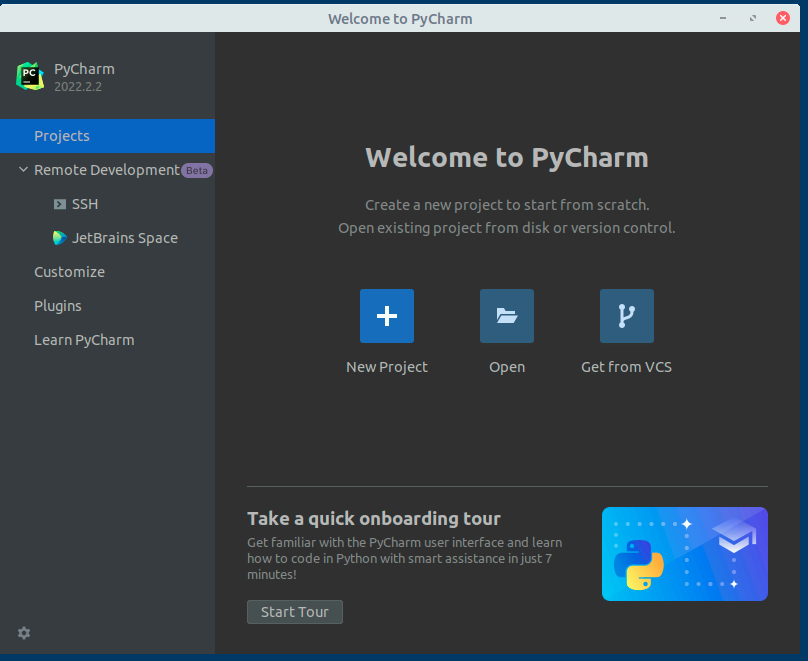

Utwórz **New Project -> Pure Python**.

W pierwszej lini przy location możesz zmienić nazwę projektu na własną i wybrać **create**.

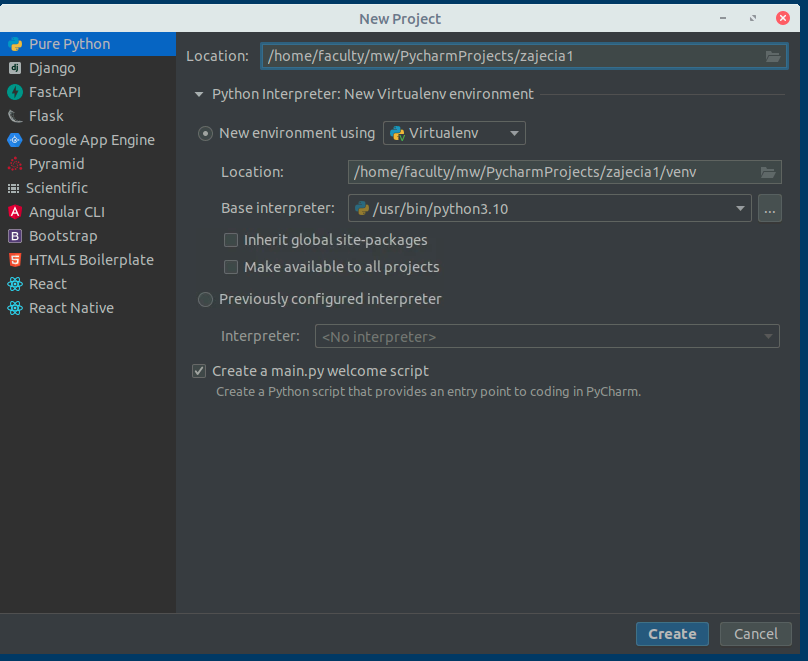

Powinieneś zobaczyć ekran edytora. Otwórz plik **main.py** wybierając z go z lewej strony w menu projektu. Tak wygląda menu:

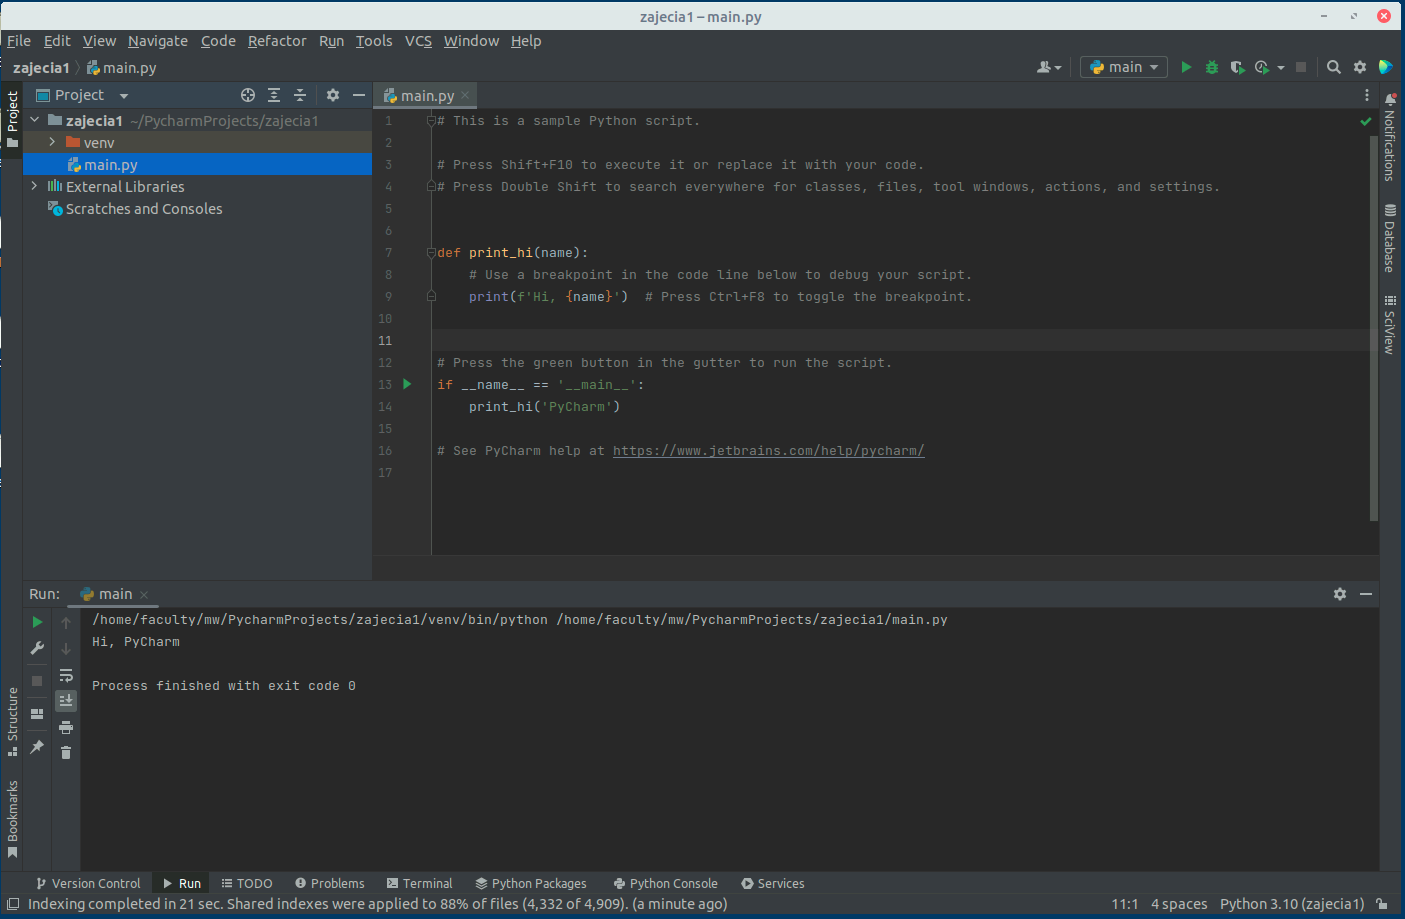

Dokładniej działania edytora i elementy skrótów klawiszowych poznamy na kolejnych zajęciach. Na ten moment istotne będą da elementy. Pierwszy to uruchomienie programu za pomocą zielonego trójkąta w górnym prawym rogu ekranu lub po wyborze prawym klawiszem myszy na ekranie z kodem lub pliku i wybór opcji <code>Run 'main'</code>.

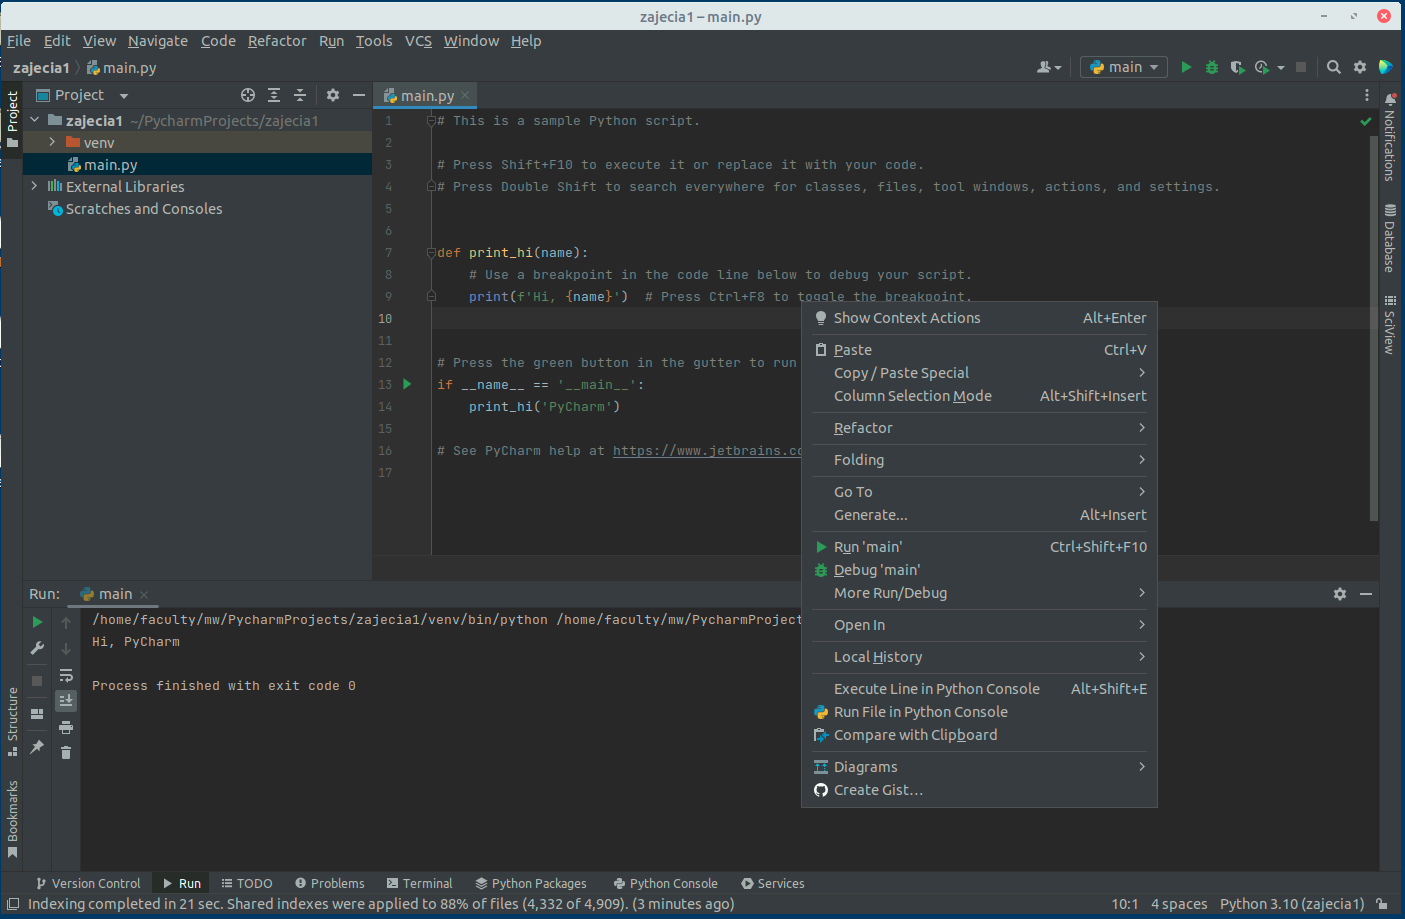

Wiedząc jak uruchamiać programy pozostaje nam poznać sposób dodawania zależności do projektu.

Zależności
-----------

W przypadku gdy wykorzystujemy zewnętrzne moduły przez <code>import</code> może okazać się, że nasze lokalne środowisko nie ma zainstalowanego jakiegoś pakietu lub program nie działa z posiadaną przez nas wersją pakietu, tylko oczekuje konkretnej innej wersji. W takim wypadku z reguły programiści udostępniają plik w którym opisane są zależności projektu.

Standardem dla języka Python jest definiowanie zależności w pliku o nazwie *requirements.txt*.

Dodaj do projektu w **PyCharm** plik *requirements.txt* (prawy klawiszem myszy na folder i **New -> File**). 

W treści pliku umieść.

Multithreading jest biblioteką napisaną przez do kolejkowania i wykonywania zadań wielowątkowo, opiera się ona na module threading który zostanie omówiony w kolejnym rozdziale. Dla nas jest tylko przykładem dla pokazania jak działają zależności i plik requirements w Python. Wybierz w IDE opcję **install requirements**. 

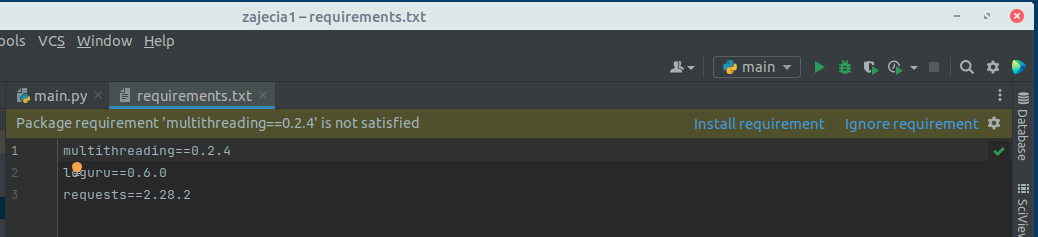

Następnie zamień implementację **main.py** na poniższą i sprawdź czy możesz o uruchomić.

In [8]:
import multithreading

class Demo(multithreading.MultiThread):
    def task(self, task):
        print(task)
        
demo = Demo(threads=3)

# Start threads
demo.start_threads()

# Adding task to queue
demo.add_task(1)
demo.add_task(2)
demo.add_task(3)

# Wait until queue is empty
demo.join()


ModuleNotFoundError: No module named 'multithreading'

Uwaga! W ramach programów uruchamianych przez **Moodle** oraz **Jupyter** nie są dostępne wszystkie zależności i biblioteki a instalacja ich jest możliwa tylko przez administratora systemu (powyżej mamy taki przyklad). W związku z tym w przypadku korzystania z niestandardowych pakietów proszę wykorzystywać **PyCharm**.

Wątki i synchronizacja
========================

W tym rozdziale dowiemy się jak tworzyć wątki w języku Python korzystając ze standardowej biblioteki.

Thread
--------

Standardowa biblioteka Pythona udostępnia moduł *threading*, który zawieraja większość operacji związanych z wielowątkowością. Klasa **Thread** w tym module zapewnia przejrzysty interfejs do pracy z wątkami.

In [9]:
import threading

from time import gmtime, strftime


def thread_function(name):
    
    print("Time %s | Thread %s: starting" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))

    print("Time %s | Thread %s: Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name,threading.current_thread().name))    
    
    print("Time %s | Thread %s: finishing" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))


print("Time %s | Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),threading.current_thread().name))

print("Time %s | Main Thread : before creating thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x = threading.Thread(target=thread_function, args=(1,))

print("Time %s | Main Thread : before running thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x.start()

print("Time %s | Main Thread : wait for the thread to finish" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

print("Time %s | Main Thread : all done" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))


Time 2023-02-26 18:32:16 | Name : MainThread
Time 2023-02-26 18:32:16 | Main Thread : before creating thread
Time 2023-02-26 18:32:16 | Main Thread : before running thread
Time 2023-02-26 18:32:16 | Thread 1: starting
Time 2023-02-26 18:32:16 | Thread 1: Name : Thread-13
Time 2023-02-26 18:32:16 | Thread 1: finishing
Time 2023-02-26 18:32:16 | Main Thread : wait for the thread to finish
Time 2023-02-26 18:32:16 | Main Thread : all done


Jak widać sam wątek definiujemy w najprostszym scenariuszu poprzez wykonanie 

> <code>threading.Thread(target=thread_function, args=(1,))</code>

Czyli definicję obiektu klasy Thread jako argument podając funkcję, którą wykona nasz wątek oraz parametry tej funkcji. W naszym wypadku przekazujemy tam liczbę, która ma być dla nas naszą *nazwą* aktualnie tworzonego wątku. Aby wątek uruchomić musimy wykonać na tym obiekcie metodę <code>start()</code>.

Powyższy kod zawiera też wywołanie funkcji systemowej <code>gmtime()</code> w celu wypisania czasu wykonania komend.

Kolejna obserwacją którą możemy dokonać jest taka, że w powyższym wykonaniu możemy zaobserwować, że nasz program działa już na dwóch wątkach, pierwszy to tak zwany główny wątek programu, który uruchamiamy startując wykonanie programu. Od niego tworzony jest dopiero drugi wątek. Żeby odczytać nazwę systemową wątku korzystamy z funkcji:

> <code>threading.current_thread().name</code>

Zobaczmy co stanie się gdy zdefiniujemy w kodzie dwa dodatkowe wątki :

In [10]:
import threading

from time import gmtime, strftime


def thread_function(name):
    
    print("Time %s | Thread %s: starting" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))

    print("Time %s | Thread %s: Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name,threading.current_thread().name))    
    
    print("Time %s | Thread %s: finishing" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))


print("Time %s | Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),threading.current_thread().name))

print("Time %s | Main Thread : before creating thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x = threading.Thread(target=thread_function, args=(1,))
x2 = threading.Thread(target=thread_function, args=(2,))

print("Time %s | Main Thread : before running thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x.start()
x2.start()

print("Time %s | Main Thread : wait for the thread to finish" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

print("Time %s | Main Thread : all done" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))


Time 2023-02-26 18:32:18 | Name : MainThread
Time 2023-02-26 18:32:18 | Main Thread : before creating thread
Time 2023-02-26 18:32:18 | Main Thread : before running thread
Time 2023-02-26 18:32:18 | Thread 1: starting
Time 2023-02-26 18:32:18 | Thread 1: Name : Thread-14
Time 2023-02-26 18:32:18 | Thread 1: finishing
Time 2023-02-26 18:32:18 | Thread 2: starting
Time 2023-02-26 18:32:18 | Thread 2: Name : Thread-15
Time 2023-02-26 18:32:18 | Thread 2: finishing
Time 2023-02-26 18:32:18 | Main Thread : wait for the thread to finish
Time 2023-02-26 18:32:18 | Main Thread : all done


W powyższym przypadku dołożyliśmy dodatkowy wątek i uruchomiliśmy go razem z pierwszym. Jak widać przetwarzanie pierwszego wątku zakończyło się zanim drugi rozpoczął swoje działanie. Nie jest to zapewne oczekiwany efekt. W celu opóźnienia wykonania wątku możemy wykorzystać metodę modułu time o nazwie <code>sleep()</code>.
 
> <code>time(sleep(2))</code>

Powoduje uśpienie wątku na 2 sec. To znaczy zatrzymanie jego wykonywania i oddanie sterowania do innych wątków w systemie. Zobaczmy na efekty zmiany.

In [13]:
import threading
import time

from time import gmtime, strftime


def thread_function(name):
    
    print("Time %s | Thread %s: starting" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))

    print("Time %s | Thread %s: Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name,threading.current_thread().name))    
    
    time.sleep(2)
    
    print("Time %s | Thread %s: finishing" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))


print("Time %s | Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),threading.current_thread().name))

print("Time %s | Main Thread : before creating thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x = threading.Thread(target=thread_function, args=(1,))
x2 = threading.Thread(target=thread_function, args=(2,))

print("Time %s | Main Thread : before running thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x.start()
x2.start()

print("Time %s | Main Thread : wait for the thread to finish" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

print("Time %s | Main Thread : all done" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

Time 2023-02-26 18:32:37 | Name : MainThread
Time 2023-02-26 18:32:37 | Main Thread : before creating thread
Time 2023-02-26 18:32:37 | Main Thread : before running thread
Time 2023-02-26 18:32:37 | Thread 1: starting
Time 2023-02-26 18:32:37 | Thread 1: Name : Thread-20
Time 2023-02-26 18:32:37 | Thread 2: starting
Time 2023-02-26 18:32:37 | Thread 2: Name : Thread-21
Time 2023-02-26 18:32:37 | Main Thread : wait for the thread to finish
Time 2023-02-26 18:32:37 | Main Thread : all done
Time 2023-02-26 18:32:39 | Thread 1: finishing
Time 2023-02-26 18:32:39 | Thread 2: finishing


> Zrób to sam!
>> Sprawdź co stanie się gdy zamiast <code>time.sleep(2)</code> zrobisz <code>time.sleep(0)</code>. Czy jak wykonasz tę operację w pętli, powiedzmy 100 razy, to wynik będzie inny ?


Deamon
----------

Co może dziwić w naszym ostatnim przykładzie to to, że nasze wątki kończą się już po tym gdy wątek główny się zakończył. W takim wypadku czy wątek główny nie powinien zamykać całego procesu i tym samym kończyć wykonanie całego programu i potomnych wątków ?

W informatyce **deamon** to proces działający w tle. W przypadku wątków będących **deamonami** zostaną one zamknięte natychmiast po zamknięciu programu. Jednym ze sposobów myślenia o tych definicjach jest rozważenie wątku demona jako wątku działającego w tle bez martwienia się o jego zamknięcie.

Jeśli program uruchamia **wątki**, które **nie są demonami**, program będzie czekał na zakończenie tych wątków przed zakończeniem działania. Jednak wątki, które są demonami, są po prostu zabijane, gdziekolwiek się znajdują, gdy program jest zamykany.

Po zakończeniu programu w Pythonie częścią procesu zamykania jest wyczyszczenie / zamknięcie wątków. Jeśli spojrzysz na źródło implementacji *threading*, zobaczysz, że <code>threading._shutdown()</code> przechodzi przez wszystkie uruchomione wątki i wywołuje <code>.join()</code> na każdym, który nie ma ustawionej flagi **demona**.

Co robi więc funkcja

> <code>join()</code>

Czeka aż wykonanie danego wątku się zakończy, aby przejść dalej.

Najpierw spójrzmy jak będzie wyglądać wykonanie programu w przypadku, gdy nasze wątki będą zdefiniowane jako deamony.


In [15]:
import threading
import time

from time import gmtime, strftime


def thread_function(name):
    
    print("Time %s | Thread %s: starting" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))

    print("Time %s | Thread %s: Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name,threading.current_thread().name))    
    
    time.sleep(2)
    
    print("Time %s | Thread %s: finishing" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))


print("Time %s | Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),threading.current_thread().name))

print("Time %s | Main Thread : before creating thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x = threading.Thread(target=thread_function, args=(1,), daemon=True)
x2 = threading.Thread(target=thread_function, args=(2,), daemon=True)

print("Time %s | Main Thread : before running thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x.start()
x2.start()

print("Time %s | Main Thread : wait for the thread to finish" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

print("Time %s | Main Thread : all done" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

Time 2023-02-26 18:32:59 | Name : MainThread
Time 2023-02-26 18:32:59 | Main Thread : before creating thread
Time 2023-02-26 18:32:59 | Main Thread : before running thread
Time 2023-02-26 18:32:59 | Thread 1: starting
Time 2023-02-26 18:32:59 | Thread 1: Name : Thread-24
Time 2023-02-26 18:32:59 | Thread 2: starting
Time 2023-02-26 18:32:59 | Thread 2: Name : Thread-25
Time 2023-02-26 18:32:59 | Main Thread : wait for the thread to finish
Time 2023-02-26 18:32:59 | Main Thread : all done
Time 2023-02-26 18:33:01 | Thread 1: finishing
Time 2023-02-26 18:33:01 | Thread 2: finishing


**Uwaga!** Jupyter nie pozwala nam uruchamiać deamon threadów, dlatego nie zobaczysz tu efektu, polecam uruchomić powyższy przykład w IDE PyCharm.

Teraz zobaczmy co stanie się w przypadku dodania opcji <code>join()</code> przed zakończeniem głównego wątku.


In [14]:
import threading
import time

from time import gmtime, strftime


def thread_function(name):
    
    print("Time %s | Thread %s: starting" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))

    print("Time %s | Thread %s: Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name,threading.current_thread().name))    
    
    time.sleep(2)
    
    print("Time %s | Thread %s: finishing" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),name))


print("Time %s | Name : %s" % (strftime("%Y-%m-%d %H:%M:%S", gmtime()),threading.current_thread().name))

print("Time %s | Main Thread : before creating thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x = threading.Thread(target=thread_function, args=(1,), daemon=True)
x2 = threading.Thread(target=thread_function, args=(2,), daemon=True)

print("Time %s | Main Thread : before running thread" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x.start()
x2.start()

print("Time %s | Main Thread : wait for the thread to finish" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x.join()
x2.join()

print("Time %s | Main Thread : all done" % strftime("%Y-%m-%d %H:%M:%S", gmtime()))

Time 2023-02-26 18:32:56 | Name : MainThread
Time 2023-02-26 18:32:56 | Main Thread : before creating thread
Time 2023-02-26 18:32:56 | Main Thread : before running thread
Time 2023-02-26 18:32:56 | Thread 1: starting
Time 2023-02-26 18:32:56 | Thread 1: Name : Thread-22
Time 2023-02-26 18:32:56 | Thread 2: starting
Time 2023-02-26 18:32:56 | Thread 2: Name : Thread-23
Time 2023-02-26 18:32:56 | Main Thread : wait for the thread to finish
Time 2023-02-26 18:32:58 | Thread 1: finishing
Time 2023-02-26 18:32:58 | Thread 2: finishing
Time 2023-02-26 18:32:58 | Main Thread : all done


Błędy jednoczesnego dostępu
-----------------------------

Głównym problemem w przetwarzaniu równoległym jest sytuacja w której wiele wątków wykonuje operacje na tym samym obiekcie. Żeby było to możliwe obiekt ten musi być oczywiście globalny i mutowalny. 

W przypadku, gdy mamy licznik zliczający wykonanie operacji i wątek **A** wykonuje operację  <code>licznik+=1</code> oraz wątek **B** wykonuje tę samą operację, to może dojść do błędu. Wynika on z tego, że operacje odczytu wartości, zwiększenia wartości i zapisania wartości w zmiennej nie są wykonywane **atomowo**. Oznacza to, że wykonanie operacji może zostać przerwane w każdym z tych momentów. 

Załóżmy, że zmienna licznik miała wartość **0**. Wątek **A** odczyta wartość **0** i zostanie przerwany, wtedy w miedzyczasie wątek **B** zwiększy wartość <code>licznik</code> do **1** i wznowi się wątek **A** nie jest on świadomy zmiany wartości, gdyż odczytał już wcześniej **0** i przejdzie do operacji zwiększenia wartości o jeden. W efekcie na koniec przetwarzania wartość <code>licznik</code> będzie równa **1**, a nie **2** jakbyśmy się spodziewali.

Zmienne utworzone poza funkcjami nazywane są **zmiennymi globalnymi**. Zmienne globalne mogą być używane przez wszystkich, zarówno wewnątrz funkcji, jak i na zewnątrz.

In [5]:
licznik = 1

def myfunc():
  print("Licznik wynosi %d" % licznik)

myfunc() 

Licznik wynosi 1


Tutaj widzimy, że uzyskaliśmy dostęp do zmiennej globalnej z wnętrza funkcji.

Jeśli jednak spróbujemy zmodyfikować zmienną globalną z wnętrza funkcji, to otrzymamy błąd:

In [6]:
# global variable
licznik = 1 

def add():

     # increment licznik by 1
    licznik += 1

    print(licznik)

add()

UnboundLocalError: local variable 'licznik' referenced before assignment

Dzieje się tak, ponieważ możemy uzyskać dostęp tylko do zmiennej globalnej, ale nie możemy jej modyfikować z poziomu funkcji.

Rozwiązaniem tego problemu jest użycie słowa kluczowego <code>global</code>.

In [ ]:
# global variable
licznik = 1 

def add():

    # use of global keyword
    global licznik

    # increment c by 2
    licznik += 1 

    print(licznik)

add()

Wykonaj zadanie na **moodle** by zaobserwować w praktyce błąd równoczesnego dostępu do zmiennej. 

**Uwaga!** to czy wywołanie błędu się powiedzie zależy od stanu systemu w danej chwili więc możesz być zmuszony uruchomić program pare razy zanim uda się osiąnąć cel.

Print
----------

Metoda <code>print</code> w języku python nie jest synchronizowana. Zaletą jest więc to, że jest szybka i nie zwalnia działania programu. Wadą jest to, że nie ma gwarancji, że operacje zostaną wypisane na ekran w kolejności ich wykonania (czyli np. w przypadku wyjątku możemy otrzymać informacje o błędzie przed otrzymaniem wszystkich oczekiwanych komunikatów na ekranie).

Nie musimy się jednak obawiać, że wypisywane komunikaty nałożą się na siebie, gdyż print jest tzw operacją monolityczną więc wykonywana jest zawsze nieprzerwanie w całości. Normalnym jest więc, że niekiedy możemy otrzymać dwa printy "sklejone" razem, jednak nigdy nie nałożą się one na siebie w sposób który nie pozwoliłby nam na odczyt zapisywanego komunikatu. 